# **Smoothing Spatial filters**

**Median Filter**

In [71]:
import numpy
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final

(-0.5, 511.5, 511.5, -0.5)

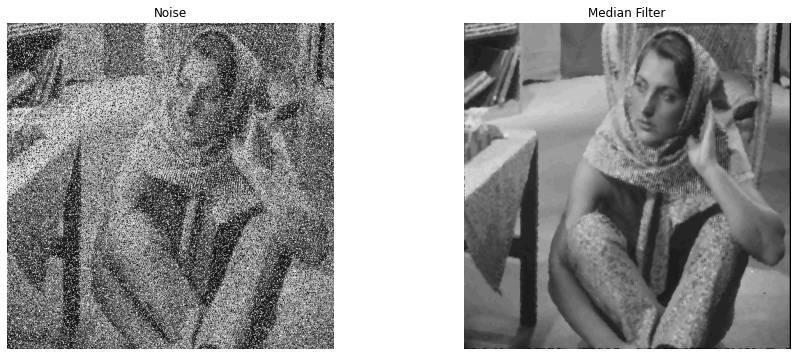

In [55]:
img = Image.open("noise.png")
arr = numpy.array(img)
removed_noise = median_filter(arr, 5) 
img1 = Image.fromarray(removed_noise)

plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("Noise")
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.imshow(img)
plt.subplot(122)
plt.title("Median Filter")
plt.imshow(img1)
plt.axis('off')

**Averaging Filter**

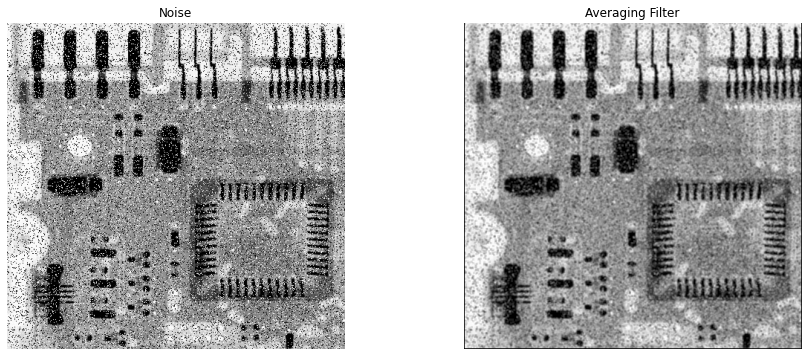

In [53]:
# Read the image
img = cv2.imread('2.png', 0)
m, n = img.shape

# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9

# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])

for i in range(1, m-1):
	for j in range(1, n-1):
		temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
		
		img_new[i, j]= temp
		
img_new = img_new.astype(np.uint8)


plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title("Noise")
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.set_cmap('gray')
plt.imshow(img)
plt.subplot(122)
plt.title("Averaging Filter")
plt.imshow(img_new, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.set_cmap('gray')
plt.imshow(img_new)


# **Sharpening Spatial filters **

robert operator, sobel operator, and laplace operator for image sharpening and edge detection

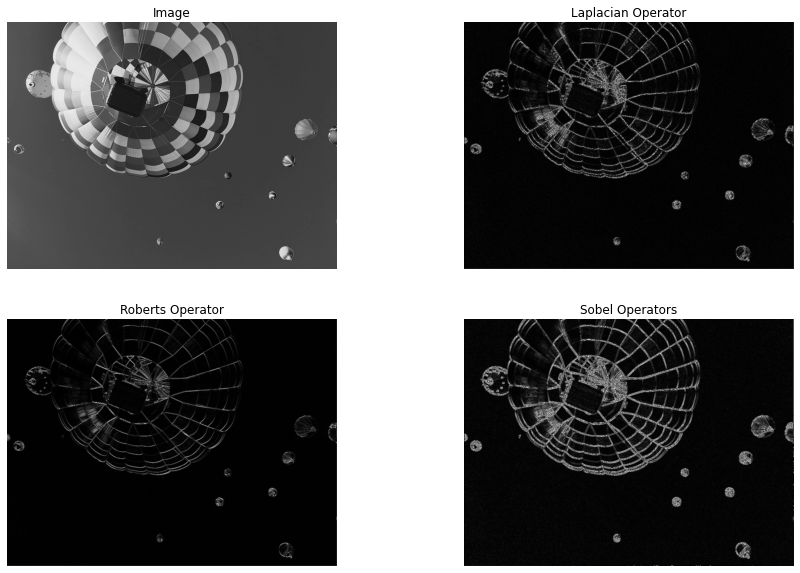

In [77]:
# robert operator [[-1,-1],[1,1]]
def robert(img):
    r, c = img.shape
    r_sunnzi = [[-1,-1],[1,1]]
    for x in range(r):
        for y in range(c):
            if (y + 2 <= c) and (x + 2 <= r):
                imgChild = img[x:x+2, y:y+2]
                list_robert = r_sunnzi*imgChild
                img[x, y] = abs(list_robert.sum()) # sum and absolute value
    return img
                 
 # # The realization of sobel operator
def sobel(img):
    r, c = img.shape
    new_image = np.zeros((r, c))
    new_imageX = np.zeros(img.shape)
    new_imageY = np.zeros(img.shape)
    s_suanziX = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) # X direction
    s_suanziY = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])     
    for i in range(r-2):
        for j in range(c-2):
            new_imageX[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * s_suanziX))
            new_imageY[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * s_suanziY))
            new_image[i+1, j+1] = (new_imageX[i+1, j+1]*new_imageX[i+1,j+1] + new_imageY[i+1, j+1]*new_imageY[i+1,j+1])**0.5

    return np.uint8(new_image) # The image processed by the directionless operator
 
# Laplace operator
def Laplace(img):
    r, c = img.shape
    new_image = np.zeros((r, c))
    L_sunnzi = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])          
    for i in range(r-2):
        for j in range(c-2):
            new_image[i+1, j+1] = abs(np.sum(img[i:i+3, j:j+3] * L_sunnzi))
    return np.uint8(new_image)
 
 
img = cv2.imread('1.png', cv2.IMREAD_GRAYSCALE)

 
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.title("Image")
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.set_cmap('gray')
plt.imshow(img)

plt.subplot(222)
plt.title("Laplacian Operator")
plt.imshow(out_laplace, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.set_cmap('gray')
plt.imshow(out_laplace)

plt.subplot(223)
plt.title("Roberts Operator")
plt.imshow(out_robert, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.set_cmap('gray')
plt.imshow(out_robert)

plt.subplot(224)
plt.title("Sobel Operators")
plt.imshow(out_sobel, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.set_cmap('gray')
plt.imshow(out_sobel)


# **Noise filters**

Impulse noise, Gaussian noise, Uniform noise

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<BarContainer object of 256 artists>

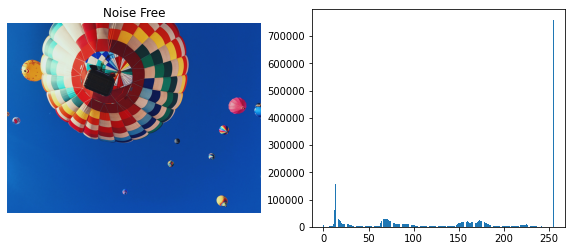

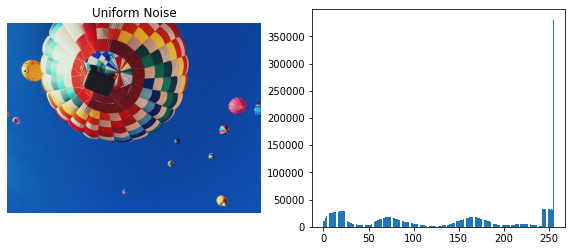

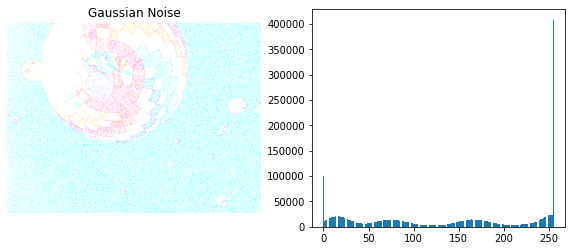

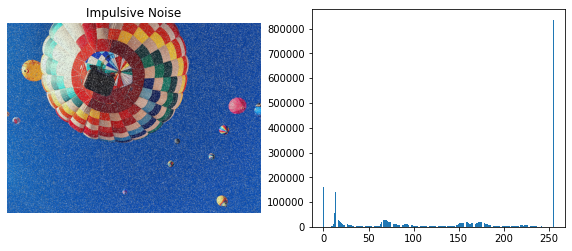

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

def uniform_noise(size, prob=0.1):
    
    levels = int((prob * 255) // 2)
    noise = np.random.randint(-levels, levels, size)
    
    return noise


def gaussian_noise(size, mean=0, std=0.01):

    noise = np.multiply(np.random.normal(mean, std, size), 255)
    
    return noise


def impulsive_noise(image, prob=0.1, mode='salt_and_pepper'):

    noise = np.array(image, copy=True)
    for x in np.arange(image.shape[0]):
        for y in np.arange(image.shape[1]):
            rnd = np.random.random()
            if rnd < prob:
                rnd = np.random.random()
                if rnd > 0.5:
                    noise[x,y] = 255
                else:
                    noise[x,y] = 0
    
    return noise


img = imageio.imread("1.png")
np.unique(img)

uni_noise = uniform_noise(img.shape, prob=0.1)
img_uni = np.clip(img.astype(int)+uni_noise, 0, 255)

hist_img,_ = np.histogram(img, bins=256, range=(0,255))
hist_uni,_ = np.histogram(img_uni, bins=256, range=(0,255))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title("Noise Free")
plt.imshow(img, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_img)

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Uniform Noise')
plt.imshow(img_uni, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_uni)

#print(np.unique(img_uni))

##########################################

# creating the noise matrix to be added
gau_noise = gaussian_noise(img.shape, mean=0, std=0.05)

# adding and clipping values below 0 or above 255
img_gau = np.clip(img.astype(int)+gau_noise, 0, 255)

hist_gau,_ = np.histogram(img_gau, bins=256, range=(0,255))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Gaussian Noise')
plt.imshow(img_gau, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_gau)

#############################################

img_imp = impulsive_noise(img, prob=0.1)

hist_imp,_ = np.histogram(img_imp, bins=256, range=(0,255))

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.title('Impulsive Noise')
plt.imshow(img_imp, cmap="gray", vmin=0, vmax=255)
plt.axis('off')
plt.subplot(122)
plt.bar(np.arange(256), hist_imp)

# **Transform /Frequency Domain filters**

**Histogram Equalization**

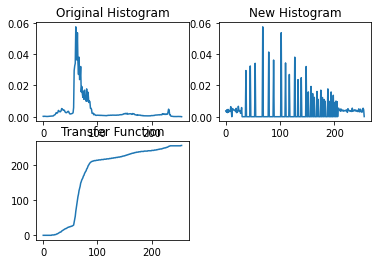

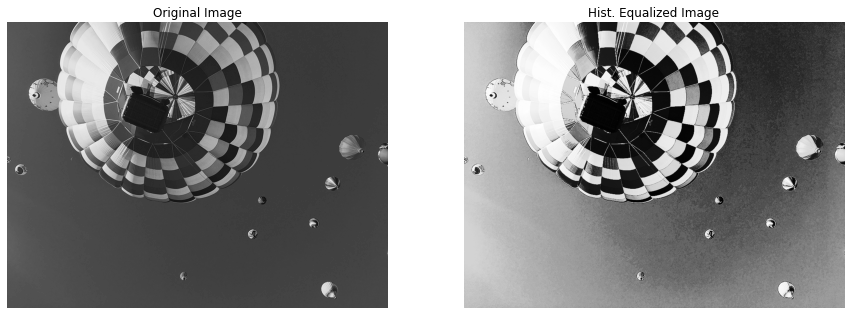

In [76]:
def imhist(im):
  # calculates normalized histogram of an image
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	return Y , h, H, sk


img = np.uint8(mpimg.imread('1.png')*255.0)

img = np.uint8((0.2126* img[:,:,0]) + \
  		np.uint8(0.7152 * img[:,:,1]) +\
			 np.uint8(0.0722 * img[:,:,2]))

new_img, h, new_h, sk = histeq(img)


# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original Histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New Histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer Function') #transfer function
plt.set_cmap('gray')
plt.show()


# show old and new image
# show original image
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.title('Original Image')

# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('Hist. Equalized Image')
plt.set_cmap('gray')
plt.axis('off')
plt.show()